### NLP Fall-23 Final Project
Members:
1. Divya Sharma (ds655)
2. Revanth Chowdary Ganga (rg361)
3. Udyan Sachdev (us26)

In [1]:
# Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../01_Data/01_Raw/raw_tweets.csv")

In [3]:
df.sample(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
24536,25043,3,1,2,0,1,there's always that dumb twitter hoe when it c...
10555,10834,3,0,3,0,1,"I hope i trip and fall into some pussy, tunechi"
19673,20110,3,1,0,2,2,RT @michellemalkin: In which I refresh dhimmi ...
12587,12900,3,2,1,0,0,Lol RT @JayFucknHarris: Youuuuu got niggas but...
14191,14532,3,0,3,0,1,RT @AngelHaze: bye bitch. im blocking u RT @on...


In [4]:
df.shape

(24783, 7)

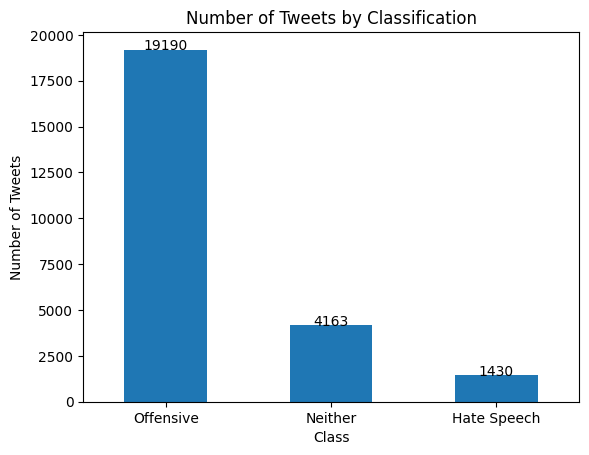

In [5]:
# plotting the class distribution with value counts
df["class"].value_counts().plot(kind="bar", title="Number of Tweets by Classification", rot=0)
plt.xlabel("Class")
plt.ylabel("Number of Tweets")
#adding the x-ticks maually
plt.xticks([0, 1, 2], ["Offensive", "Neither", "Hate Speech"])

#plottinf the counts on the bars
for index, value in enumerate(df["class"].value_counts()):
    plt.text(index, value, str(value), ha="center")
plt.show()

In [6]:
df["class"].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

Data is imbalanced, balance it later

In [7]:
df["Length"] = df["tweet"].apply(len)

<Axes: ylabel='Frequency'>

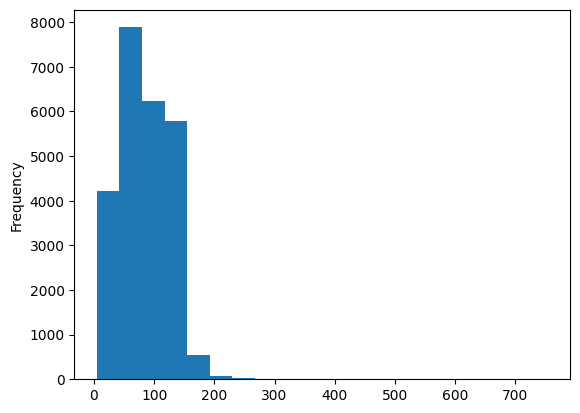

In [8]:
# Plotting the length of the tweets by bins of 20
df["Length"].plot(bins=20, kind="hist")

In [9]:
# Checking if there are any 0 length tweets
df[df["Length"] == 0]["tweet"].count()

0

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

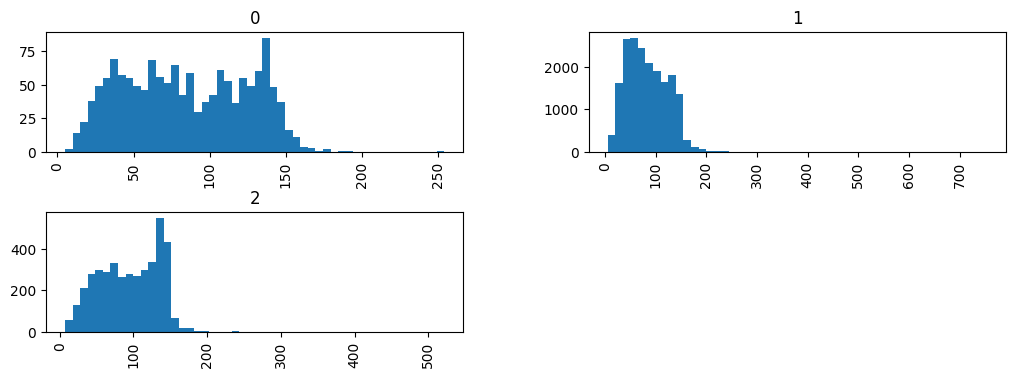

In [10]:
# checking relationship between length of tweet and class
df.hist(column="Length", by="class", bins=50, figsize=(12, 4))

consider limiting the range of tweets to prevent outliers

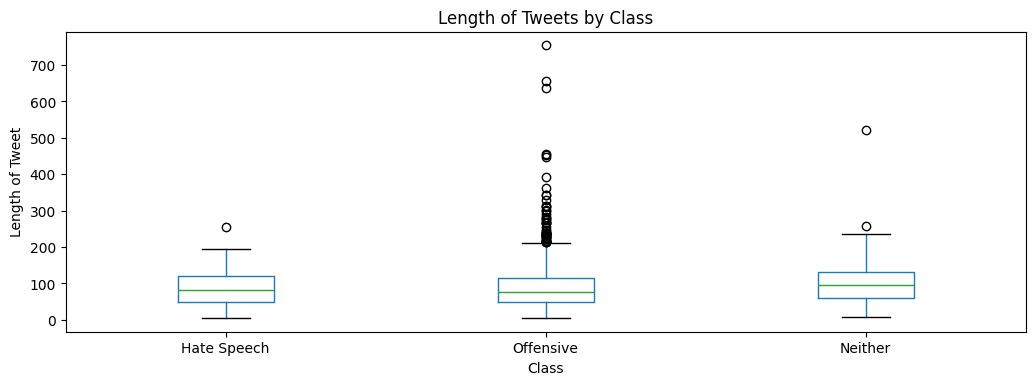

In [11]:
#plot legnth of tweet box plot by class
df.boxplot(column="Length", by="class", figsize=(12, 4))
#removing the title
plt.title("Length of Tweets by Class")
plt.suptitle("")
plt.xlabel("Class")
plt.ylabel("Length of Tweet")
#adding the x-ticks maually
plt.xticks([1, 2, 3], ["Hate Speech", "Offensive", "Neither"])
#removing grid lines
plt.grid(False)


In [12]:
# check len of tweets > 200 by class
df[df["Length"] > 150]["class"].value_counts()

class
1    706
2    126
0     33
Name: count, dtype: int64

In [13]:
df[df["Length"] < 10]["class"].value_counts()

class
1    29
2     7
0     2
Name: count, dtype: int64

Remaing EDA to be done after data cleaning